- Pradeep E
- 212223230149
- AIDS



In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=10, h2=11, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [38]:
torch.manual_seed(32)
model = Model()

In [39]:
model.fc1.weight[0][0].item()

0.3756536841392517

In [40]:
model.fc2.weight[0][0].item()

0.22321008145809174

- Pradeep E
- 212223230149
- AIDS


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('iris.csv')

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [44]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [45]:
X = df.drop('target',axis=1)
y = df['target']

In [46]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [48]:
type(y)

pandas.core.series.Series

In [49]:
#convert them into NumPy
X = X.values
y = y.values   # because libraries (like Scikit-Learn, TensorFlow, and PyTorch) require NumPy arrays as input instead of Pandas Series.

In [50]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [53]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [54]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [55]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)   # decrees 0.001

In [56]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)>

In [57]:

epoch = 100
losses = []

for i in range (epoch):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)

    losses.append(loss)

    if i % 10 == 0:
        print(f'Epoch {i} and loss is : {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch 0 and loss is : 1.2287585735321045
Epoch 10 and loss is : 0.902197003364563
Epoch 20 and loss is : 0.6540483832359314
Epoch 30 and loss is : 0.42333120107650757
Epoch 40 and loss is : 0.2715650498867035
Epoch 50 and loss is : 0.16194994747638702
Epoch 60 and loss is : 0.10307655483484268
Epoch 70 and loss is : 0.07937680184841156
Epoch 80 and loss is : 0.06927236169576645
Epoch 90 and loss is : 0.06381548941135406


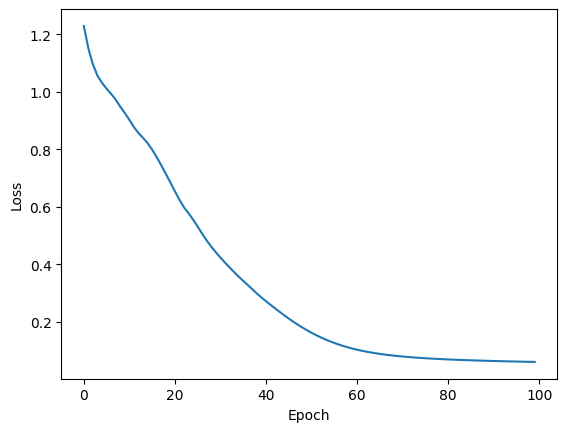

In [58]:
plt.plot(range(epoch),[loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch');
plt.show()

-Validate the model with test set

In [61]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [62]:
loss

tensor(0.0528)

In [63]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}).{str(y_val)} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
        print(f'we got {correct} correct')

        #  The highest value determines the predicted class.
        # i → Represents the current index (0, 1, 2) of the loop iteration.

1).tensor([-2.3818,  5.5614, -0.5316]) 1
we got 1 correct
2).tensor([-2.2289,  6.2476, -1.0567]) 1
we got 2 correct
3).tensor([ 7.8022,  1.8603, -8.9239]) 0
we got 3 correct
4).tensor([-3.8397,  5.4741,  1.4346]) 1
we got 4 correct
5).tensor([-6.7264,  3.4268,  6.6528]) 2
we got 5 correct
6).tensor([-10.0735,   1.6007,  12.2865]) 2
we got 6 correct
7).tensor([ 7.9342,  1.9882, -9.1035]) 0
we got 7 correct
8).tensor([ 8.3615,  1.9010, -9.5082]) 0
we got 8 correct
9).tensor([-6.6542,  3.7999,  6.2964]) 2
we got 9 correct
10).tensor([-8.4321,  3.1662,  9.0560]) 2
we got 10 correct
11).tensor([-9.0085,  2.7436, 10.1075]) 2
we got 11 correct
12).tensor([ 7.4421,  1.6750, -8.4671]) 0
we got 12 correct
13).tensor([-8.4762,  2.5632,  9.5246]) 2
we got 13 correct
14).tensor([-3.7753,  5.1759,  1.5620]) 1
we got 14 correct
15).tensor([-7.0977,  3.8724,  6.8024]) 2
we got 15 correct
16).tensor([-2.2390,  6.0375, -0.9412]) 1
we got 16 correct
17).tensor([-5.3073,  4.1050,  4.2984]) 2
we got 17 cor

In [64]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}).   {str(y_val.argmax().item())}    {y_test[i]}')



1).   1    1
2).   1    1
3).   0    0
4).   1    1
5).   2    2
6).   2    2
7).   0    0
8).   0    0
9).   2    2
10).   2    2
11).   2    2
12).   0    0
13).   2    2
14).   1    1
15).   2    2
16).   1    1
17).   2    2
18).   0    0
19).   1    1
20).   2    2
21).   0    0
22).   0    0
23).   2    2
24).   0    0
25).   2    2
26).   2    2
27).   1    1
28).   1    1
29).   2    2
30).   2    2


- to save trained model to a file

In [65]:
torch.save(model.state_dict(),'michael_iris_model.pt')

In [66]:
new_model = Model()  # w or B
new_model.load_state_dict(torch.load('michael_iris_model.pt'))

<All keys matched successfully>

In [67]:
new_model

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [68]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [69]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([ 8.1267,  2.6889, -9.5279])
tensor(0)


- Pradeep E
- 212223230149
- AIDS